# AutoEncoder for MsPacman-v4

The goal here is to write an autoencoder that compresses randomly sampled observations from the MsPacman-v4 environment. Useful to test that our autoencoder implementation works, and possibly useful as a starting point for the RL agent.

In [1]:
# A hack to support importing from "src".
import sys
sys.path.append("/Users/bubblyworld/Workspace/python/world-models")

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import losses

from src.nets.autoencoder import AutoEncoder

In [3]:
dataset = tf.data.experimental.load("datasets/MsPacman-v4-RandomAgent")
dataset = dataset.shuffle(len(dataset))
dataset = dataset.map(lambda x: x / 255.0) # rescale to [0, 1]
batched_dataset = dataset.map(lambda x: (x, x)) # input is output for autoencoders
batched_dataset = batched_dataset.batch(32)

dataset_shape = dataset.element_spec.shape
dataset_shape

2022-04-06 16:29:59.602189: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


TensorShape([210, 160, 3])

## Model Definition and Training

We're using a convolutional encoder/decoder architecture since we're working with images.

In [8]:
autoencoder = AutoEncoder(dataset_shape, [32, 16], 1024)
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
autoencoder.build([None] + dataset_shape)
autoencoder.summary()

Model: "auto_encoder_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 1024)              34085264  
                                                                 
 sequential_3 (Sequential)   (None, 210, 160, 3)       34117507  
                                                                 
Total params: 68,202,771
Trainable params: 68,202,771
Non-trainable params: 0
_________________________________________________________________


In [14]:
history = autoencoder.fit(
    batched_dataset,
    epochs=20,
    shuffle=True,
    validation_data=batched_dataset
)

Epoch 1/20
197/197 [==============================] - 175s 871ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 2/20
197/197 [==============================] - 173s 864ms/step - loss: 0.0018 - val_loss: 0.0013
Epoch 3/20
197/197 [==============================] - 172s 858ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 4/20
197/197 [==============================] - 173s 863ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 5/20
197/197 [==============================] - 172s 861ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 6/20
197/197 [==============================] - 172s 858ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 7/20
197/197 [==============================] - 171s 855ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 8/20
197/197 [==============================] - 172s 856ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 9/20
197/197 [==============================] - 171s 854ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 10/20
197/197 [==============================] - 172s 858m

## Visualise the Result

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


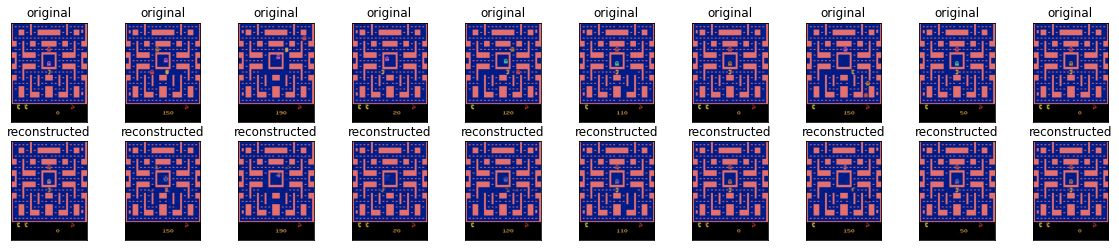

In [15]:
sample_imgs = tf.stack(list(dataset.take(10)))
encoded_imgs = autoencoder.encoder(sample_imgs)
decoded_imgs = autoencoder.decoder(encoded_imgs)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(sample_imgs[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()